In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = os.path.join(os.getcwd(),"Fruits_vegetables","train")
data_test_path = os.path.join(os.getcwd(),"Fruits_vegetables","test")
data_val_path = os.path.join(os.getcwd(),"Fruits_vegetables","validation")

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
  data_train_path,
  shuffle=True,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
  data_val_path,
  shuffle=False,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
  data_test_path,
  shuffle=False,
  image_size=(img_width,img_height),
  batch_size=32,
  validation_split = False
  )

Found 359 files belonging to 36 classes.


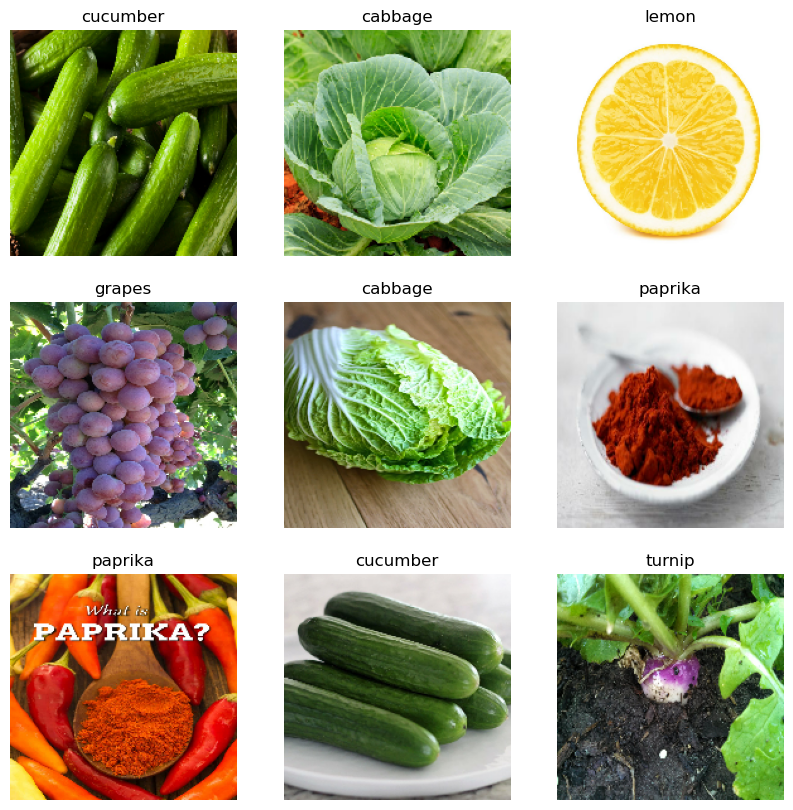

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 37s 359ms/step - loss: 3.3028 - accuracy: 0.1140 - val_loss: 2.4047 - val_accuracy: 0.3362
Epoch 2/25
98/98 [==============================] - 37s 368ms/step - loss: 2.4096 - accuracy: 0.3021 - val_loss: 1.6769 - val_accuracy: 0.5242
Epoch 3/25
98/98 [==============================] - 35s 345ms/step - loss: 1.9123 - accuracy: 0.4408 - val_loss: 1.0147 - val_accuracy: 0.7749
Epoch 4/25
98/98 [==============================] - 36s 361ms/step - loss: 1.3043 - accuracy: 0.6180 - val_loss: 0.6891 - val_accuracy: 0.8433
Epoch 5/25
98/98 [==============================] - 37s 362ms/step - loss: 0.7937 - accuracy: 0.7689 - val_loss: 0.5234 - val_accuracy: 0.8889
Epoch 6/25
98/98 [==============================] - 37s 363ms/step - loss: 0.5086 - accuracy: 0.8600 - val_loss: 0.4440 - val_accuracy: 0.9145
Epoch 7/25
98/98 [==============================] - 36s 352ms/step - loss: 0.3382 - accuracy: 0.9152 - val_loss: 0.3316 - val_accuracy: 0.9373

Text(0.5, 1.0, 'Loss')

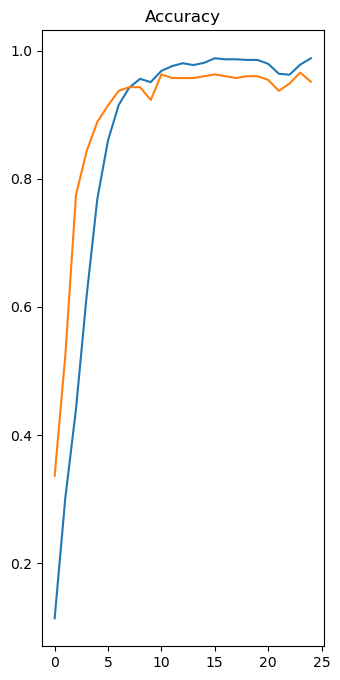

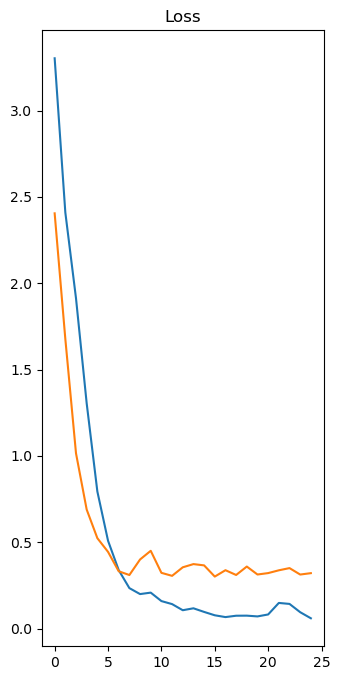

In [12]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [34]:
path = os.path.join(os.getcwd(),"Fruits_vegetables","test", "apple", "Image_1.jpg")
image = tf.keras.utils.load_img(path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)  # Convert PIL image to NumPy array
img_tensor = tf.convert_to_tensor(img_arr, dtype=tf.float32)  # Convert NumPy array to TensorFlow tensor

# Expand dimensions to create a batch of size 1
img_bat = tf.expand_dims(img_tensor, 0)

In [35]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 19ms/step


In [36]:
score = tf.nn.softmax(predict)

In [37]:
print('Image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Image is apple with accuracy of 99.97


In [39]:
model.save('Image_classify.h5')

In [26]:
cat_df = pd.DataFrame(data_cat)
cat_df.to_csv("categories.csv", header=False, index = False)

In [33]:
from tensorflow.keras.models import load_model
model2 = load_model('Image_classify.keras')
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

1/1 [==============================] - 0s 18ms/step
Image is apple with accuracy of 99.97
